<a href="https://colab.research.google.com/github/jennagreenwood8/COMP210-SP-22/blob/main/Copy_of_literally_just_copy_from_this_one_please_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/16lyLJpsH_vVsV5KBFuOBZ8s-oE2aFt16Z8guYk_FmGQ/edit?usp=sharing')

In [ ]:
sheet = wb.worksheet('Sheet1')

In [ ]:
data = sheet.get_all_values()

In [ ]:
import pandas as pd

In [ ]:
pd.options.display.max_colwidth = 100

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.columns = df.iloc[0]
df = df.iloc[1:]

In [ ]:
df.columns = df.columns.str.rstrip()


In [ ]:
df.drop(['file','student name (choose 10)'], axis=1, inplace=True)

In [ ]:
df = df.replace('\n',' ', regex=True)

In [ ]:
df = df.replace('\r','', regex=True)

In [ ]:
df = df.replace('\t','', regex=True)

In [ ]:
df.text = df.text.str.replace(","," ").replace("."," ").replace(";"," ").replace("!"," ").replace("?"," ")

In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
df['interviewee_racial_indentiy'].value_counts()

white          136
black           61
                26
other            7
multiracial      4
Name: interviewee_racial_indentiy, dtype: int64

In [ ]:
 #pay close attention to name I give to the dataframe variable! you want to make sure you keep track of any new dataframes you create.
df_interviewee_black = df[df.interviewee_racial_indentiy.str.contains('black')]
df_interviewee_white = df[df.interviewee_racial_indentiy.str.contains('white')]

In [ ]:
df_interviewee_black["text_new"] = df_interviewee_black['text'].str.lower().str.replace('[^\w\s]','')
new_df_interviewee_black = df_interviewee_black.text_new.str.split(expand=True).stack().value_counts().reset_index()
new_df_interviewee_black.columns = ['Word', 'Frequency']
new_df_interviewee_black

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Word,Frequency
0,the,6716
1,i,6139
2,to,5349
3,and,5344
4,a,4427
...,...,...
12283,sedan,1
12284,betrayed,1
12285,assists,1
12286,occurrences,1


In [ ]:
df_interviewee_white["text_new"] = df_interviewee_white['text'].str.lower().str.replace('[^\w\s]','')
new_df_interviewee_white = df_interviewee_white.text_new.str.split(expand=True).stack().value_counts().reset_index()
new_df_interviewee_white.columns = ['Word', 'Frequency']
new_df_interviewee_white

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Word,Frequency
0,the,20109
1,and,14961
2,to,13068
3,i,13067
4,a,12045
...,...,...
20459,relic,1
20460,materializing,1
20461,fakeback,1
20462,tap,1


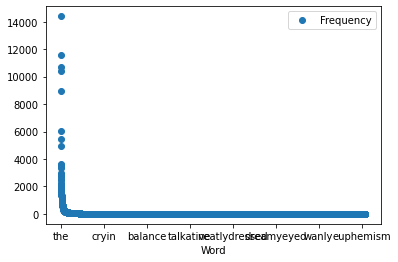

In [ ]:
new_df_interviewee_women.plot(x='Word', y='Frequency', style='o')

In [ ]:
custom_words = ['and', 'to', 'an', 'the', 'a', 'of','in','i','was','he','it','she', 'that', 'me', 'for', 'we', 'on', 'her', 'but', 'my', 'you', 'had']

In [ ]:
df_interviewee_women['stopwords_custom_text'] = df_interviewee_women['text_new'].apply(lambda x: ' '.join([word for word in x.split() if word not in (custom_words)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df_stop_interviewee_women = df_interviewee_women.stopwords_custom_text.str.split(expand=True).stack().value_counts().reset_index()
new_df_stop_interviewee_women.columns = ['Word', 'Frequency']
new_df_stop_interviewee_women

,Word,Frequency
0,with,2235
1,is,2140
2,they,2065
3,when,1853
4,as,1738
...,...,...
17688,coursed,1
17689,selfconsciousness,1
17690,390,1
17691,daysoff,1


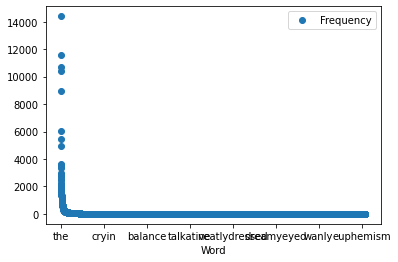

In [ ]:
new_df_interviewee_women.plot(x='Word', y='Frequency', style='o')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

stop.append('one')
stop.append('got')
stop.append('time')
stop.append('dont')
stop.append('said')
stop.append('get')
stop.append('like')
stop.append('come')
stop.append('good')
stop.append('two')
stop.append('never')
stop.append('know')
stop.append('would')
stop.append('go')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_interviewee_black['stopwords_text'] = df_interviewee_black['text_new'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df_stop_interviewee_black_stopwords = df_interviewee_black.stopwords_text.str.split(expand=True).stack().value_counts().reset_index()
new_df_stop_interviewee_black_stopwords.columns = ['Word', 'Frequency']
new_df_stop_interviewee_black_stopwords

,Word,Frequency
0,de,1411
1,aint,582
2,house,467
3,man,466
4,dat,454
...,...,...
12132,genrally,1
12133,snatched,1
12134,searchin,1
12135,oozin,1


In [ ]:
df_interviewee_white['stopwords_text'] = df_interviewee_white['text_new'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
new_df_stop_interviewee_white_stopwords = df_interviewee_white.stopwords_text.str.split(expand=True).stack().value_counts().reset_index()
new_df_stop_interviewee_white_stopwords.columns = ['Word', 'Frequency']
new_df_stop_interviewee_white_stopwords

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Word,Frequency
0,work,1058
1,little,1014
2,old,978
3,could,960
4,back,933
...,...,...
20308,tying,1
20309,characterizations,1
20310,cherty,1
20311,satire,1
